In [1]:
from neural_cryptography import get_model
from neural_cryptography.utils import utf32_encode, utf32_decode
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from matplotlib import pyplot as plt

In [2]:
model, encoder, decoder = get_model((100, 100, 3), 100, 256)
model.load_weights("best_weights.h5")
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 100)     25600       input_2[0][0]                    
__________________________________________________________________________________________________
flatten (Flatten)               (None, 10000)        0           embedding[0][0]                  
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
______________________________________________________________________________________________

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


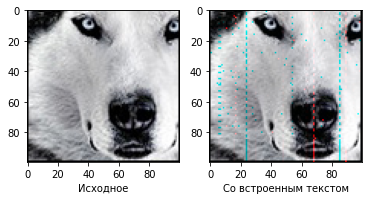

In [3]:
img = np.expand_dims(img_to_array(load_img("wolf.jpg")) / 255.0, axis=0)
sen = utf32_encode('Привет, криптография!', 100)
y = encoder.predict([img, sen])
plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.xlabel('Исходное')
plt.subplot(1, 2, 2)
plt.imshow(y[0])
plt.xlabel('Со встроенным текстом')
plt.show()

In [4]:
y_hat = decoder.predict(y)
print(utf32_decode(y_hat))

ﺩПривет, криптография!  
